# Confidence Intervals

## Sample Mean vs. Population Mean

Sample means and population means are different. Generally, we want to know about a population mean, but we can only calculate a sample mean. We then want to use the sample mean to estimate the population mean. We use confidence intervals in an attempt to determine how accurately our sample mean estimates the population mean.
Confidence Interval
If I asked you to estimate the average height of a woman in the USA, you might do this by measuring 10 women and estimating that the mean of that sample was close to the population. Let's try that.

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# We'll set a seed here so our runs are consistent
np.random.seed(10)

# Let's define some 'true' population parameters, we'll pretend we don't know these.
POPULATION_MU = 64
POPULATION_SIGMA = 5

# Generate our sample by drawing from the population distribution
sample_size = 10
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
print (heights)
mean_height = np.mean(heights)
print ('sample mean: ', mean_height)

[70.65793252 67.57639487 56.27299854 63.95808075 67.10667987 60.3995722
 65.32755793 64.54274263 64.02145715 63.12699895]
sample mean:  64.29904154070394


Unfortunately simply reporting the sample mean doesn't do much for us, as we don't know how it relates to the population mean. To get a sense for how it might relate, we can look for how much variance there is in our sample. Higher variance indicates instability and uncertainty.

In [3]:
print ('sample standard deviation: ', np.std(heights))

sample standard deviation:  3.759878018454642


This still doesn't do that much for us, to really get a sense of how our sample mean relates to the population mean we need to compute a standard error. The standard error is a measure of the variance of the sample mean.

IMPORTANT
Computing a standard error involves assuming that the way you sample is unbaised, and that the data are normal and independent. If these conditions are violated, your standard error will be wrong. There are ways of testing for this and correcting.

In [4]:
SE = np.std(heights) / np.sqrt(sample_size)
print ('standard error: ', SE)

standard error:  1.1889778262717268


In [5]:
stats.sem(heights, ddof=0)

1.1889778262717268

Assuming our data are normally distributed, we can use the standard error to compute our confidence interval. To do this we first set our desired confidence level, say 95%, we then determine how many standard deviations contain 95% of the mass. Turns out that the 95% of the mass lies between -1.96 and 1.96 on a standard normal distribution. When the samples are large enough (generally > 30 is taken as a threshold) the Central Limit Theorem applies and normality can be safely assumed; if sample sizes are smaller, a safer approach is to use a 
-distribution with appropriately specified degrees of freedom. The actual way to compute the values is by using a cumulative distribution function (CDF). If you are not familiar with CDFs, inverse CDFs, and their companion PDFs, you can read about them here and here. Look here for information on the 
-distribution. We can check the 95% number using one of the Python functions.

NOTE: Be careful when applying the Central Limit Theorem, however, as many datasets in finance are fundamentally non-normal and it is not safe to apply the theorem casually or without attention to subtlety.

We can visualize the 95% mass bounds here.

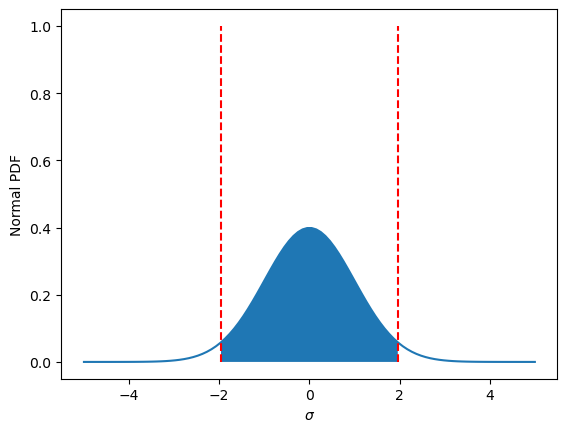

In [6]:
# Set up the x axis
x = np.linspace(-5,5,100)
# Here's the normal distribution
y = stats.norm.pdf(x,0,1)
plt.plot(x,y)

# Plot our bounds
plt.vlines(-1.96, 0, 1, colors='r', linestyles='dashed')
plt.vlines(1.96, 0, 1, colors='r', linestyles='dashed')

# Shade the area
fill_x = np.linspace(-1.96, 1.96, 500)
fill_y = stats.norm.pdf(fill_x, 0, 1)
plt.fill_between(fill_x, fill_y)

plt.xlabel('$\sigma$')
plt.ylabel('Normal PDF');

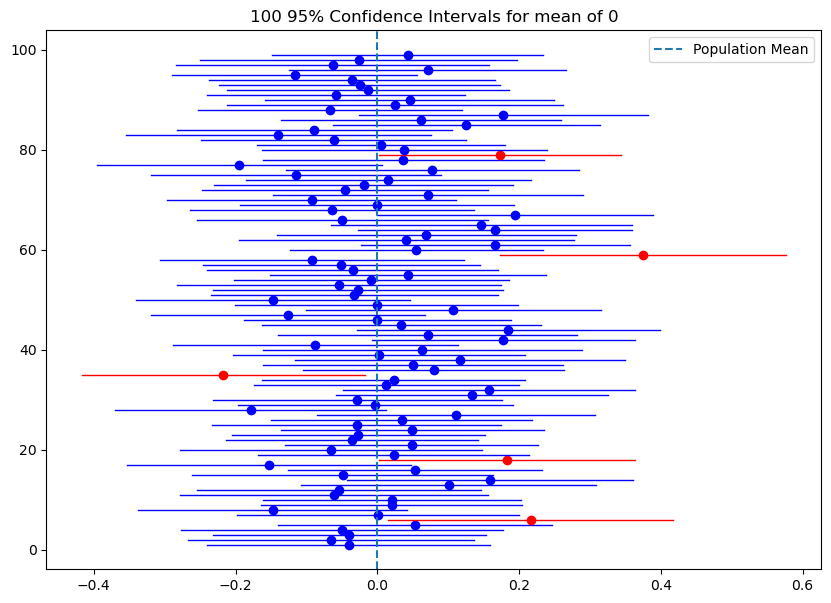

In [7]:
np.random.seed(8309)
n = 100 # number of samples to take
samples = [np.random.normal(loc=0, scale=1, size=100) for _ in range(n)]

fig, ax = plt.subplots(figsize=(10, 7))
for i in np.arange(1, n, 1):
    sample_mean = np.mean(samples[i])  # calculate sample mean
    se = stats.sem(samples[i])  # calculate sample standard error
    h = se*stats.t.ppf((1+0.95)/2, len(samples[i])-1) # calculate t; 2nd param is d.o.f. 
    sample_ci = [sample_mean - h, sample_mean + h]
    if ((sample_ci[0] <= 0) and (0 <= sample_ci[1])):
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='blue', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'bo');
    else:
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='red', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'ro');
plt.axvline(x=0, ymin=0, ymax=1, linestyle='--', label = 'Population Mean');
plt.legend(loc='best');
plt.title('100 95% Confidence Intervals for mean of 0');

# T-test
Since the sample size is small, we'll use a T-test.

In [8]:
# standard error SE was already calculated
t_val = stats.t.ppf((1+0.95)/2, 9)  # d.o.f. = 10 - 1
print ('sample mean height:', mean_height)
print ('t-value:', t_val)
print ('standard error:', SE)
print ('confidence interval:', (mean_height - t_val * SE, mean_height + t_val * SE))

sample mean height: 64.29904154070394
t-value: 2.2621571627409915
standard error: 1.1889778262717268
confidence interval: (61.60938683466314, 66.98869624674474)


There is a built-in function in scipy.stats for computing the interval. Remember to specify the degrees of freedom.

In [9]:
print ('99% confidence interval:', stats.t.interval(0.99, df=9,
                                                   loc=mean_height, scale=SE))
print ('95% confidence interval:', stats.t.interval(0.95, df = 9, 
                                                   loc=mean_height, scale=SE))
print ('80% confidence interval:', stats.t.interval(0.8, df = 9, 
                                                   loc=mean_height, scale=SE))

99% confidence interval: (60.43505913983995, 68.16302394156793)
95% confidence interval: (61.60938683466314, 66.98869624674474)
80% confidence interval: (62.65465103765395, 65.94343204375393)


Note that as your confidence increases, the interval necessarily widens.

Assuming normality, there's also a built in function that will compute our interval for us. This time you don't need to specify the degrees of freedom. Note that at a corresponding level of confidence, the interval calculated using the normal distribution is narrower than the interval calcuated using the 
-distribution.

In [10]:
print (stats.norm.interval(0.99, loc=mean_height, scale=SE))
print (stats.norm.interval(0.95, loc=mean_height, scale=SE))
print (stats.norm.interval(0.80, loc=mean_height, scale=SE))

(61.23643761452335, 67.36164546688453)
(61.968687822794635, 66.62939525861324)
(62.77530514604759, 65.82277793536029)


What does this mean?
Confidence intervals allow us to set our desired confidence, and then report a range that will likely contain the population mean. The higher our desired confidence, the larger range we report. In general, one can never report a single point value, because the probability that any given point is the true population mean is incredibly small. Let's see how our intervals tighten as we change sample size.

In [11]:
np.random.seed(10)

sample_sizes = [10, 100, 1000]
for s in sample_sizes:
    heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, s)
    SE = np.std(heights) / np.sqrt(s)
    print (stats.norm.interval(0.95, loc=mean_height, scale=SE))

(61.968687822794635, 66.62939525861324)
(63.343692029946574, 65.2543910514613)
(64.00593339807287, 64.59214968333501)


Visualizing Confidence Intervals
Here is some code to visualize a confidence interval on a graph. Feel free to play around with it.

63.588854219913536 65.57346359543473


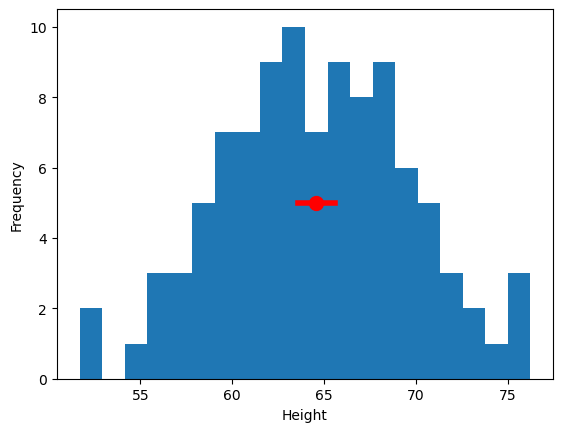

In [12]:
sample_size = 100
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
SE = np.std(heights) / np.sqrt(sample_size)
(l, u) = stats.norm.interval(0.95, loc=np.mean(heights), scale=SE)

print (l, u)

plt.hist(heights, bins=20)
plt.xlabel('Height')
plt.ylabel('Frequency')

# Just for plotting
y_height = 5
plt.plot([l, u], [y_height, y_height], '-', color='r', linewidth=4, label='Confidence Interval')
plt.plot(np.mean(heights), y_height, 'o', color='r', markersize=10);

# T-Test
T-test is used to compare the mean of two different samples or groups when the sample size is ≤ 30 and the data follows a normal or Gaussian distribution, i.e., the data is symmetrically distributed.

There are three different types of T-tests. We decide which T-Test to use based on the nature of the data or the design of the experiment.

1. One Sample T-test: used to compare the mean value of a sample with a known mean or average. The null and alternative hypotheses of this T-test are as follows:
i. Null Hypothesis: μ = M

ii. Alternative Hypothesis: μ ≠ M

Where μ is the sample mean and M is the known mean.

2. Independent Sample T-test: used to compare the mean values of two different samples from two different populations.

i. Null Hypothesis: μ₁ = μ₂

ii. Alternative Hypothesis: μ₁ ≠ μ₂

Where μ₁ and μ₂ are the sample means for the two independent samples.

3. Dependent or Paired sample T-test: used to compare the means of two dependent samples taken from the same population at different points in time.

i. Null Hypothesis: μ₂— μ₁= 0

ii. Alternative Hypothesis: μ₂—μ₁ ≠ 0

Where μ₁ and μ₂ are the sample means for the two dependent samples.


# 1. One Sample T-Test

In [13]:
import numpy as np
import random
import scipy.stats as stats

# We will use random data for the samples and label them as 'a' and 'b' respectively
a = [random.gauss(50, 20) for x in range(30)]
b = [random.gauss(55, 15) for x in range(30)]

# One Sample T-test for sample 'a'
# Null Hypothesis: The sample mean = population mean(45)
t_stat, p_value = stats.ttest_1samp(a, 45, axis=0)


print("T-statistic:", t_stat)
print("P-value:", p_value)
print(np.mean(a))

# Interpretation of the results: The p-value is less than 0.05(signifance level) and the sample mean(appro. 53) is also ≠ population mean(45).
# We reject the null hypothesis

T-statistic: -0.05354437716518357
P-value: 0.9576653349374185
44.81902328341662


# 2. Independent Sample T-test

In [14]:
import numpy as np
import random
import scipy.stats as stats

a = [ random.gauss(50,20) for x in range (30)]
b = [ random.gauss(55,15) for x in range (30)]

# Independent sample test
# Null hypothesis: mean of a = mean of b
t_stat, p_value = stats.ttest_ind(a,b,equal_var = False)

print("T-statistic:", t_stat)
print("P-value:", p_value)
print(np.mean(a), np.mean(b))

# Interpretation of the results: The p-value is greater than 0.05(signifance level) and the mean of a = mean of b
# We accept the null hypothesis

T-statistic: 0.38448329924079405
P-value: 0.7025004598924183
52.75562486707239 50.913147764862664


# 3. Dependent or Paired Sample T-test

In [15]:
import numpy as np
import random
import scipy.stats as stats
a = [ random.gauss(50,20) for x in range (30)]
b = [ random.gauss(55,15) for x in range (30)]

#Paired sample t-test
# Null hypothesis: mean of b - mean of a = 0
a = [random.gauss(50,20) for x in range(30)]
b = [random.gauss(60,25) for x in range(30)]
t_stat,p_value = stats.ttest_rel(a,b)

print("T-statistic:", t_stat)
print("P-value:", p_value)
print(np.mean(a) - np.mean(b))

# Interpretation of the results: The p-value is less than 0.05(signifance level) and the mean of b - mean of a ≠ 0
# We reject the null hypothesis

T-statistic: -1.523498118974917
P-value: 0.138465837823563
-9.179213029018925


# Z-Test
Z-test is used to compare the difference between a sample and a known population mean or between the mean of two independent samples. We use the z-test when the sample size is ≥ 30 and the population standard deviation is known.

There are two different types Z-test.

1. :

One-sample Z-test: used to compare one sample mean with a known population m
ean.
i. Null Hypothesis: μ = μ₀

ii. Alternative Hypothesis: μ ≠ μ₀

Where μ is the population mean and μ₀ is a specified value you compare with the population mean.

2. Two-sample Z-test: used to compare the mean values of two independent samples.

i. Null Hypothesis: μ₁ = μ₂

ii. Alternative Hypothesis: μ₁ ≠ μ₂

Where μ₁ and μ₂ are the population means of the two independent samples ystatsmodels” library.

# 1. One Sample Z-Test

In [16]:
import numpy as np
import random
from statsmodels.stats.weightstats import ztest as ztest

# to reproduce the same random values 
random.seed(20)

# We will use random data for the sample
a = [random.gauss(100, 15) for x in range(40)]  # where 100 is the mean(specified value) and 15 is the standard deviation

# One Sample Z-test for sample 'a'
# Null Hypothesis: Mean of a = 100 
z_stat, p_value = ztest(a, value=100)


print("Z-statistic:", z_stat)
print("P-value:", p_value)
print(np.mean(a))

# Interpretation of the results: The p-value is greater than 0.05, and the mean of a is close to 100
# We accept the null hypothesis

Z-statistic: 1.3430675401429018
P-value: 0.17925010504664385
103.16971855035202


# 2. Two Sample Z-Test

In [17]:
import numpy as np
import random
from statsmodels.stats.weightstats import ztest as ztest

# to reproduce the same random values 
random.seed(20)

# We will use random data as the sample
# Null Hypothesis: Mean of a = mean of b
a = [random.gauss(100, 15) for x in range(40)]
b = [random.gauss(120, 15) for x in range(40)]

# Two Sample Z-test for samples 'a' and 'b'
# Null Hypothesis: Mean of a = Mean of 'b'
z_stat, p_value = ztest(a, b, value=0)

print("Z-statistic:", z_stat)
print("P-value:", p_value)
print(np.mean(a), np.mean(b))

# Interpretation of the results: the p-value is less than 0.05 and mean of a ≠ mean of b
# We reject the null hypothesis

Z-statistic: -4.726323028827322
P-value: 2.2862185838572706e-06
103.16971855035202 119.25584826105356
